<a href="https://colab.research.google.com/github/OMWANDHOJR/Kaggle-Competition/blob/main/Housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATA **SET**


In [3]:
df_1 = pd.read_csv('/content/sample_data/Housing_prices_dataset/train.csv')
df_2 = pd.read_csv('/content/sample_data/Housing_prices_dataset/test.csv')

if "SalePrice" not in df_2.columns:
  df_2['SalePrice'] = 0
df = pd.concat([df_1, df_2], axis=0)
df = df.set_index('Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.isna().sum()

,0
MSSubClass,0
MSZoning,4
LotFrontage,486
LotArea,0
Street,0
...,...
MoSold,0
YrSold,0
SaleType,1
SaleCondition,0


In [6]:
# Calculate the sum of null values for each column
null_sums = df.isnull().sum()

# Filter the columns with more than 0 null values
columns_with_nulls = null_sums[null_sums > 0].index

# Select the subset of the DataFrame containing only the columns with null values
df_null = df[columns_with_nulls]

df_null.head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD


<Axes: ylabel='Id'>

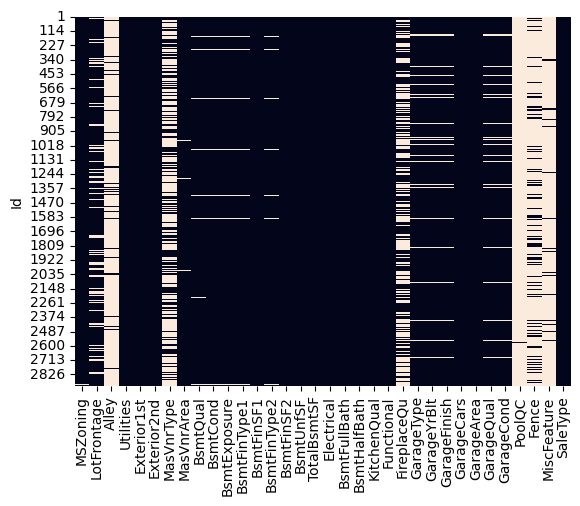

In [7]:
sns.heatmap(df_null.isnull(), cbar=False)

In [8]:
df_objects = df[df.select_dtypes(include=['object']).columns]
df = df.drop(df[df_objects.isna().sum()[df_objects.isna().sum()> 1100].index], axis= 1)

In [10]:
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum()> 1100].index], axis= 1)
df_objects = df_objects.fillna('null')
df_objects_encoded = pd.get_dummies(df_objects)

In [11]:
df_objects['Utilities'].value_counts()

,count
Utilities,
AllPub,2916
null,2
NoSeWa,1


In [15]:
for i in df_objects_encoded.columns:
  if 'null' in i:
    df_objects_encoded = df_objects_encoded.drop(i, axis= 1)
    print(i)

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [16]:
new_df = pd.concat([df, df_objects_encoded], axis=1)

In [17]:
len(new_df.columns)

304

In [18]:
new_df = new_df.drop(df.select_dtypes(include=['object']), axis= 1)
new_df.isna().sum()[new_df.isna().sum()> 0]

,0
LotFrontage,486
MasVnrArea,23
BsmtFinSF1,1
BsmtFinSF2,1
BsmtUnfSF,1
TotalBsmtSF,1
BsmtFullBath,2
BsmtHalfBath,2
GarageYrBlt,159
GarageCars,1


In [19]:
mode_columns = ['GarageCars', 'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1']
mean_columns = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']

for i in mode_columns:
  new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

for i in mean_columns:
  new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))
new_df.isna().sum()[new_df.isna().sum()> 0]

,0


In [20]:
training_data = new_df[0:len(df_1)]
testing_data = new_df[len(df_1):]
testing_data = testing_data.drop(columns= 'SalePrice')

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor


In [22]:
X = training_data.drop(columns= 'SalePrice')
y = training_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

In [25]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1)) # Reshape y for scaling

In [27]:
# Dictionary of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=42)
}

# Dictionary to store model performance
results = {}

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data only
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) #Transform the test set


# Train and evaluate each model
for name, model in models.items():
    # Fit model
    if name == "Linear Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {"MSE": mse, "R² Score": r2}

# Convert results to DataFrame and sort by best R² score
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R² Score", ascending=False)

print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                            MSE  R² Score
XGBoost            7.146273e+08  0.906832
Random Forest      8.203713e+08  0.893046
Linear Regression  8.205846e+08  0.893018


In [28]:


# Initialize the XGBoost model
model1 = XGBRegressor(objective="reg:squarederror", random_state=42)

# Fit the model to the training data
model1.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [30]:
pred = model1.predict(testing_data)
final = pd.DataFrame({'Id': testing_data.index, 'SalePrice': pred})
final.to_csv('submission.csv', index=False)

In [ ]:
pred = model1.predict(testing_data)
final = pd.DataFrame({'Id': testing_data.index, 'SalePrice': pred})
final.to_csv('submission.csv', index=False)